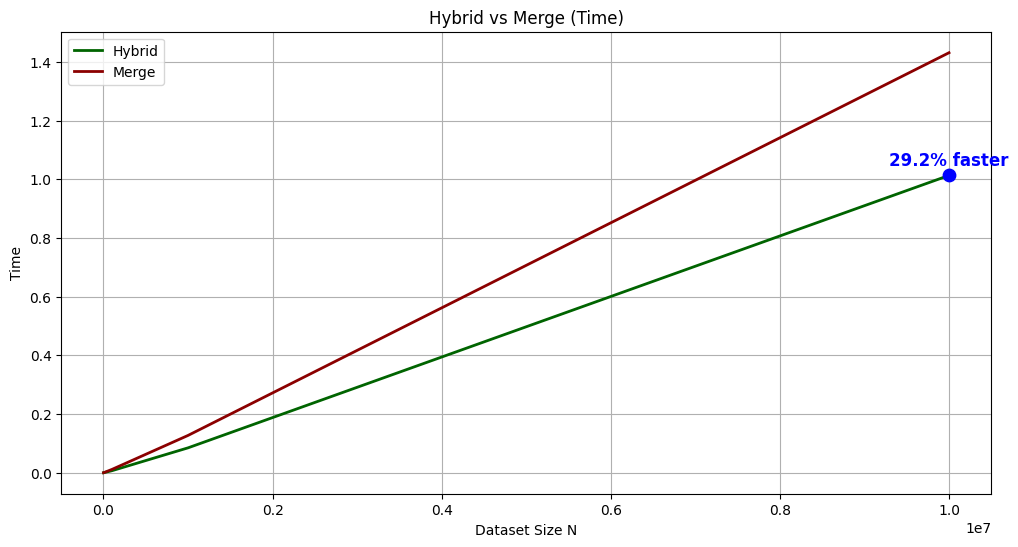

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load tab-separated CSV
df = pd.read_csv("merge_vs_hybrid.csv", sep='\t')  # Columns: N, Type, Comparisons, Time

Ns = sorted(df['N'].unique())

# Separate types
hybrid_df = df[df['Type'] == 'Hybrid']
merge_df = df[df['Type'] == 'Merge']


# Average trend
avg_hybrid = hybrid_df.groupby('N')['Time'].mean()
avg_merge = merge_df.groupby('N')['Time'].mean()

# Plotting
plt.figure(figsize=(12,6))
plt.plot(avg_hybrid.index, avg_hybrid.values, color='darkgreen', linewidth=2, label='Hybrid')
plt.plot(avg_merge.index, avg_merge.values, color='darkred', linewidth=2, label='Merge')

# Highlight % improvement for N = 10 million
N_target = 10_000_000
if N_target in avg_hybrid.index and N_target in avg_merge.index:
    t_hybrid = avg_hybrid.loc[N_target]
    t_merge = avg_merge.loc[N_target]
    improvement = (t_merge - t_hybrid) / t_merge * 100
    plt.scatter(N_target, t_hybrid, color='blue', s=80, zorder=5)  # mark the point
    plt.text(N_target, t_hybrid * 1.02, f'{improvement:.1f}% faster', color='blue',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xlabel('Dataset Size N')
plt.ylabel('Time')
plt.title('Hybrid vs Merge (Time)')
plt.grid(True)
plt.legend()
plt.show()


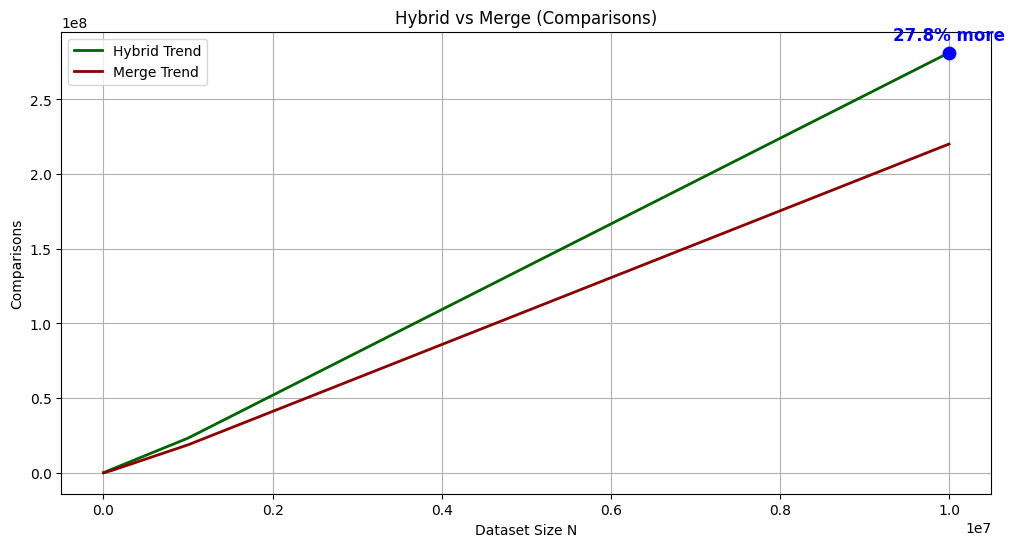

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load tab-separated CSV
df = pd.read_csv("merge_vs_hybrid.csv", sep='\t')  # Columns: N, Type, Comparisons, Time

Ns = sorted(df['N'].unique())

# Separate types
hybrid_df = df[df['Type'] == 'Hybrid']
merge_df = df[df['Type'] == 'Merge']

# Average trend
avg_hybrid = hybrid_df.groupby('N')['Comparisons'].mean()
avg_merge = merge_df.groupby('N')['Comparisons'].mean()

# Plotting
plt.figure(figsize=(12,6))
plt.plot(avg_hybrid.index, avg_hybrid.values, color='darkgreen', linewidth=2, label='Hybrid Trend')
plt.plot(avg_merge.index, avg_merge.values, color='darkred', linewidth=2, label='Merge Trend')

# Highlight % improvement for N = 10 million
N_target = 10_000_000
if N_target in avg_hybrid.index and N_target in avg_merge.index:
    c_hybrid = avg_hybrid.loc[N_target]
    c_merge = avg_merge.loc[N_target]
    improvement = (c_merge - c_hybrid) / c_merge * 100
    plt.scatter(N_target, c_hybrid, color='blue', s=80, zorder=5)  # mark the point
    
    # Dynamic label
    label = f'{abs(improvement):.1f}% more'
        
    plt.text(N_target, c_hybrid * 1.02, label, color='blue',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xlabel('Dataset Size N')
plt.ylabel('Comparisons')
plt.title('Hybrid vs Merge (Comparisons)')
plt.grid(True)
plt.legend()
plt.show()
